<a href="https://colab.research.google.com/github/Merve33y/Proje_Grup5/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("NetflixOriginals.csv", encoding="utf-8")
df.head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi


In [3]:
#Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.
feature_films = df[df["Runtime"]>90]  
feature_films = feature_films.groupby("Language").agg({"Title":"count"}).reset_index()
feature_films

,Language,Title
0,Dutch,3
1,English,252
2,English/Akan,1
3,English/Arabic,1
4,English/Japanese,1
5,English/Korean,1
6,English/Taiwanese/Mandarin,1
7,English/Ukranian/Russian,1
8,Filipino,2
9,French,13


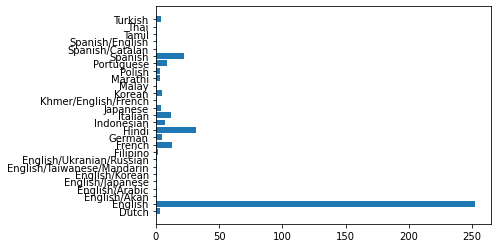

In [4]:
plt.barh(feature_films["Language"], feature_films["Title"])
plt.show()

In [5]:
#2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.
df["Premiere"] = pd.to_datetime(df["Premiere"]).dt.date

In [6]:
new_df = df[((df["Genre"]=="Documentary") & ((df["Premiere"]>datetime.date(2019, 1, 1)) & (df["Premiere"]<datetime.date(2020, 6, 30))))]

In [7]:
new_df.head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish
20,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,64,4.4,English
30,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish
111,Ghosts of Sugar Land,Documentary,2019-10-16,21,5.5,English
151,One Take,Documentary,2020-06-18,85,5.7,Thai
263,A Tale of Two Kitchens,Documentary,2019-05-22,30,6.3,English/Spanish
286,The Legend of Cocaine Island,Documentary,2019-03-29,87,6.3,English
290,Travis Scott: Look Mom I Can Fly,Documentary,2019-08-28,85,6.3,English
295,Birders,Documentary,2019-09-25,37,6.4,English/Spanish


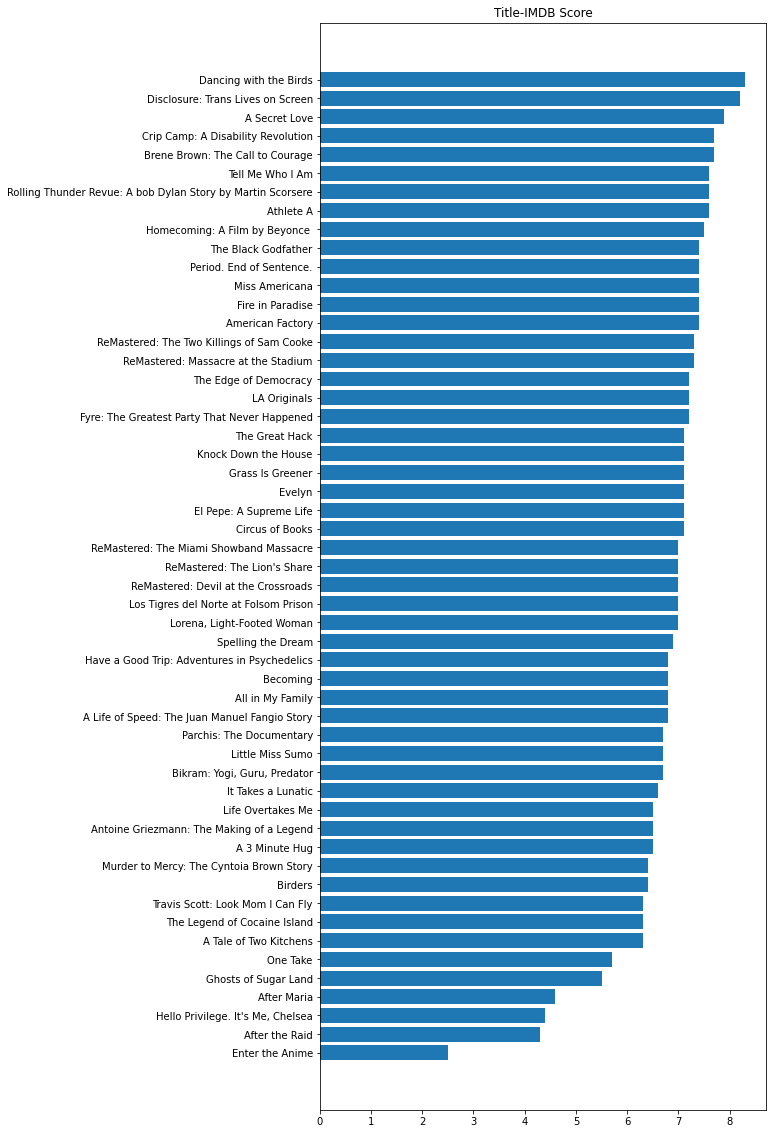

In [8]:
fig=plt.figure(figsize=(8,20))
plt.barh(new_df["Title"],new_df["IMDB Score"])
plt.title("Title-IMDB Score")
plt.show()

In [9]:
#İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir? 
new1_df=df[df["Language"]=="English"].sort_values(by="IMDB Score",ascending=False)
new1_df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
...,...,...,...,...,...,...
14,Mercy,Thriller,2016-11-22,90,4.2,English
10,Searching for Sheela,Documentary,2021-04-22,58,4.1,English
8,Paradox,Musical/Western/Fantasy,2018-03-23,73,3.9,English
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English


In [10]:
#'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir? 
new2_df=df[df["Language"]=="Hindi"]
import statistics
x = statistics.mean(new2_df["Runtime"])
print(x)

115.78787878787878


In [11]:
# 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.
df["Genre"].unique() #Kategoriler

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

In [12]:
len(df["Genre"].unique()) #Toplam kategori sayısı

115

In [13]:
category_of_genre = df.groupby("Genre").agg({"Title":"count"}).reset_index()
category_of_genre

,Genre,Title
0,Action,7
1,Action comedy,5
2,Action thriller,1
3,Action-adventure,1
4,Action-thriller,3
...,...,...
110,War,2
111,War drama,2
112,War-Comedy,1
113,Western,3


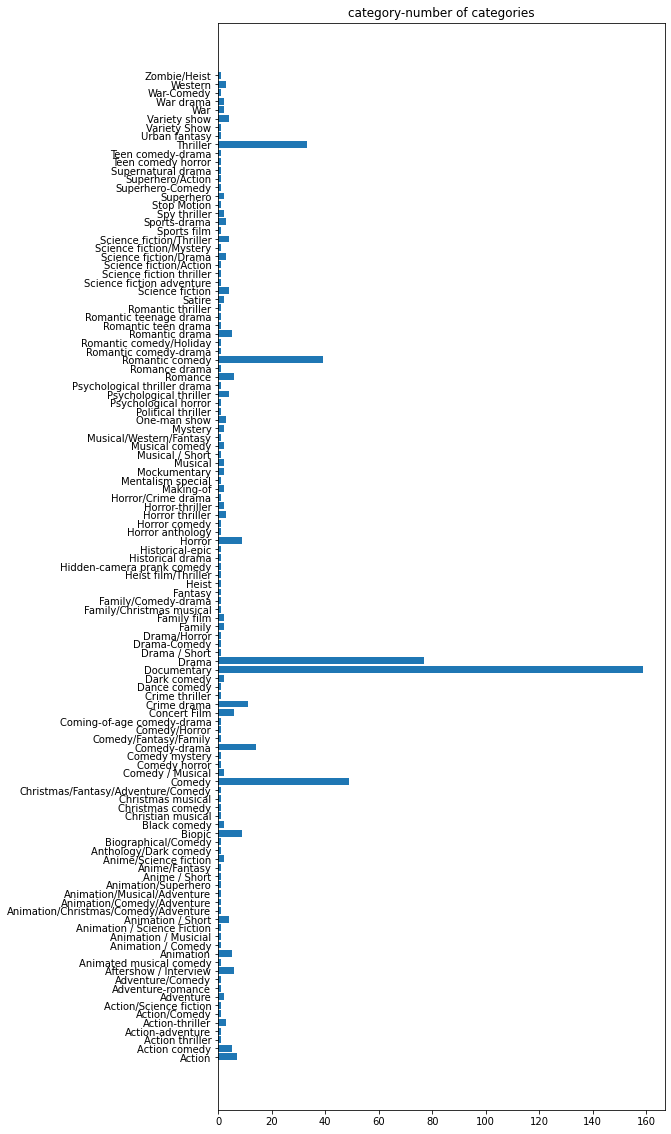

In [14]:
fig=plt.figure(figsize=(8,20))
plt.barh(category_of_genre["Genre"], category_of_genre["Title"], )
plt.title("category-number of categories")
plt.show()

In [15]:
#Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.
most_used=df.groupby('Language').agg({"Title":"count"}).sort_values(by="Title",ascending=False)[0:3]
most_used



,Title
Language,
English,401
Hindi,33
Spanish,31


In [16]:
           #(2.yol)
most_used=df.groupby('Language').size()
most_used.sort_values(ascending=False)[0:3]

Language
English    401
Hindi       33
Spanish     31
dtype: int64

In [17]:
#IMDB puanı en yüksek olan ilk 10 film hangileridir?
new3_df=df.sort_values(by="IMDB Score",ascending=False).reset_index(drop=True)[0:10]
new3_df["Title"]

0       David Attenborough: A Life on Our Planet
1      Emicida: AmarElo - It's All For Yesterday
2                        Springsteen on Broadway
3    Winter on Fire: Ukraine's Fight for Freedom
4          Taylor Swift: Reputation Stadium Tour
5     Ben Platt: Live from Radio City Music Hall
6                         Dancing with the Birds
7                        Cuba and the Cameraman 
8                                          Klaus
9                                           13th
Name: Title, dtype: object

In [18]:
#IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.
df["IMDB Score"].corr(df["Runtime"])


-0.04089629142078858

Text(0.5, 1.0, 'Coralation')

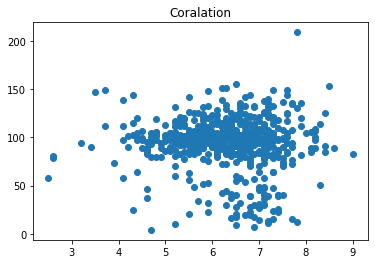

In [19]:
plt.scatter(df["IMDB Score"],df["Runtime"])
plt.title("Coralation")

In [20]:
#IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.
top_genre= df.groupby("Genre").agg({"IMDB Score":"max"}).reset_index().sort_values(by="IMDB Score",ascending=False)[0:10]
top_genre

,Genre,IMDB Score
45,Documentary,9.0
74,One-man show,8.5
40,Concert Film,8.4
17,Animation/Christmas/Comedy/Adventure,8.2
46,Drama,7.9
16,Animation / Short,7.8
41,Crime drama,7.8
70,Musical / Short,7.7
66,Making-of,7.7
111,War drama,7.7


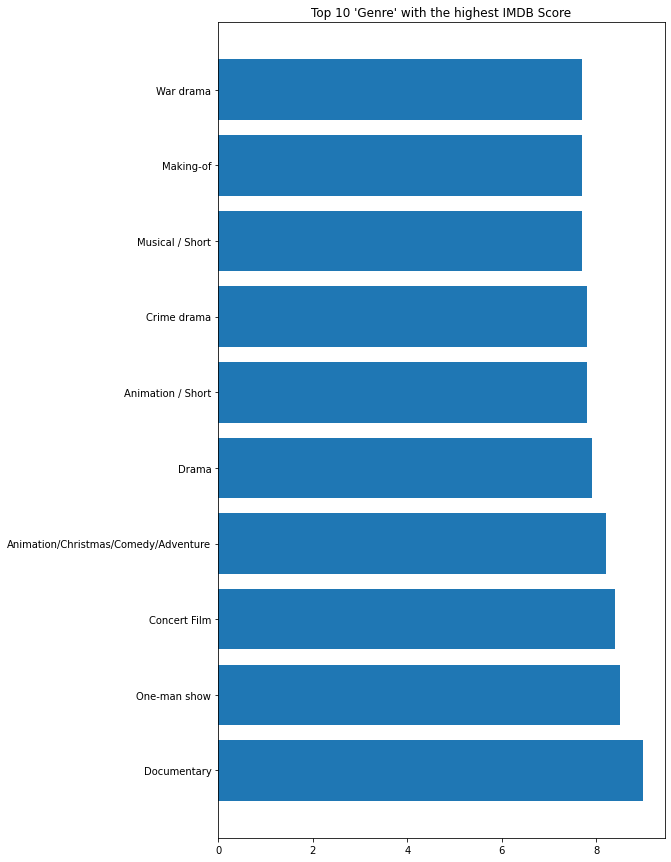

In [21]:
fig=plt.figure(figsize=(8,15))
plt.barh(top_genre["Genre"], top_genre["IMDB Score"], )
plt.title("Top 10 'Genre' with the highest IMDB Score")
plt.show()

In [22]:
#'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.
top_film=df.groupby("Title").agg({"Runtime":"max"}).reset_index().sort_values(by="Runtime",ascending=False)[0:10]
top_film

,Title,Runtime
469,The Irishman,209
115,Da 5 Bloods,155
410,Springsteen on Broadway,153
460,The Forest of Love,151
99,Citation,151
343,Raat Akeli Hai,149
479,The Last Days of American Crime,149
272,Ludo,149
54,Army of the Dead,148
136,Drive,147


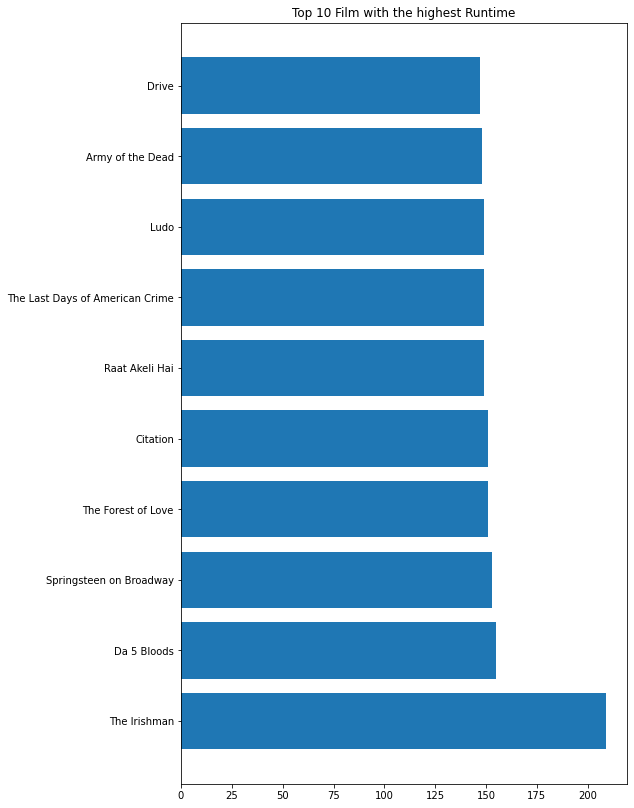

In [23]:
fig=plt.figure(figsize=(8,14))
plt.barh(top_film["Title"], top_film["Runtime"], )
plt.title("Top 10 Film with the highest Runtime")
plt.show()

In [24]:
#Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.
new4_df = df.copy();
new4_df["Premiere"] = pd.to_datetime(new4_df["Premiere"]).dt.year 
a= new4_df.groupby("Premiere").agg({"Title":"count"}).reset_index().sort_values(by="Title",ascending=False)
a

,Premiere,Title
6,2020,183
5,2019,125
4,2018,99
7,2021,71
3,2017,66
2,2016,30
1,2015,9
0,2014,1


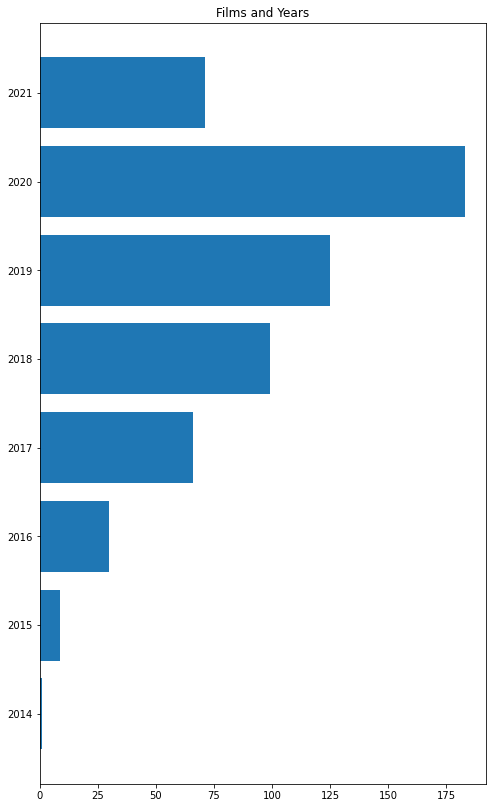

In [25]:
fig=plt.figure(figsize=(8,14))
plt.barh(a["Premiere"], a["Title"], )
plt.title("Films and Years")
plt.show()

In [26]:
#Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.
new6_df=df.groupby("Language").agg({"IMDB Score":"mean"}).reset_index().sort_values(by="IMDB Score",ascending=True)
new6_df.head()



,Language,IMDB Score
24,Malay,4.200000
6,English/Japanese,4.400000
26,Norwegian,5.100000
14,Filipino,5.100000
27,Polish,5.166667


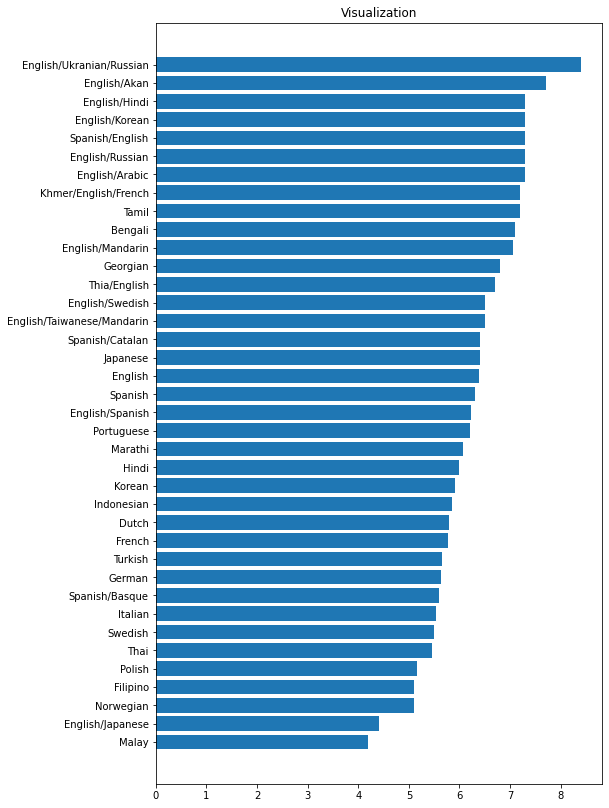

In [27]:
fig=plt.figure(figsize=(8,14))
plt.barh(new6_df["Language"], new6_df["IMDB Score"], )
plt.title("Visualization")
plt.show()

In [28]:
#Hangi yılın toplam "runtime" süresi en fazladır?
new5_df = df.copy();
new5_df["Premiere"] = pd.to_datetime(new5_df["Premiere"]).dt.year 
b= new5_df.groupby("Premiere").agg({"Runtime":"sum"}).reset_index().sort_values(by="Runtime",ascending=False)
b

,Premiere,Runtime
6,2020,17384
5,2019,10856
4,2018,9405
7,2021,7214
3,2017,6129
2,2016,2766
1,2015,814
0,2014,81


In [29]:
#Her bir dilin en fazla kullanıldığı "Genre" nedir?
df.groupby("Language").agg({"Genre":"sum"}).reset_index().sort_values(by="Genre",ascending=False)


,Language,Genre
3,English/Akan,War drama
17,German,ThrillerSupernatural dramaSatireDramaRomantic ...
29,Spanish,ThrillerDocumentaryDramaThrillerDramaComedyThr...
33,Swedish,Thriller
20,Italian,Science fiction/DramaComedyComedyDramaDramaRom...
1,Dutch,Romantic comedyFantasyCrime drama
19,Indonesian,Romantic comedyDramaRomantic dramaDramaComedy-...
21,Japanese,Psychological thriller dramaDramaAnime/Science...
18,Hindi,MysteryActionComedyHorror anthologyThrillerThr...
27,Polish,HorrorRomantic comedyThriller


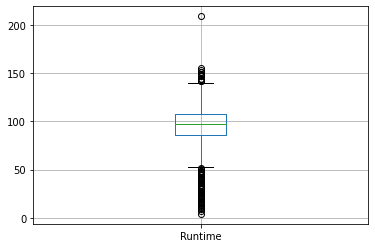

In [30]:
#Veri setinde outlier veri var mıdır? Açıklayınız.
df.boxplot(column=['Runtime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB
